# Assignment 2 - Deep Learning - Automatic Differentiation

### Part 1 - Working out backward functions

#### Question 1

Let $f(x, y) = \frac{x}{y} $. Then, $ f(x, y) $ can be rewritten as $ xy^{-1} $.
The derivative with respect to x is:

$$
\frac{df(x, y)}{dx} = y^{-1} = \frac{1}{y}
$$

The derivative of a constant time a function is the constant times the derivative of the function. So applying the power rule, the derivative of x with respect to x is 1.
Now, the derivative with respect to y is:

$$
\frac{df(x, y)}{dy} = -xy^{-2} = -\frac{x}{y^2}
$$

Again, by the power rule, the derivative of y with respect to y is -1 times $ y^{-2} $.


#### Question 3 

Define dimensions:
- `f = 4` (features)
- `m = 3` (output dimension)
- `n = 2` (samples)

**Forward pass:**
- `X` is an `n x f` matrix with normally distributed random values. (`X.shape` is `(n, f)`)
- `W` is an `m x f` matrix with normally distributed random values. (`W.shape` is `(m, f)`)
- Compute `Y` as the dot product of `X` and the transpose of `W`, resulting in an `n x m` matrix. (`Y.shape` is `(n, m)`)

**Copy of `Y` for gradient computation:**
- `g` is a copy of `Y`.

**Backward pass:**
- Compute the gradient with respect to `W` as `dW = g.T @ X`, resulting in an `m x f` matrix. (`dW.shape` is `(m, f)`)
- Compute the gradient with respect to `X` as `dx = g @ W`, resulting in an `n x f` matrix. (`dx.shape` is `(n, f)`)



In [16]:
import numpy as np
f = 4; m = 3; n = 2;

# forward
X = np.random.randn(n, f); print(X.shape)
W = np.random.randn(m, f); print(W.shape)
Y = np.dot(X, W.T); print(Y.shape)

g = Y.copy()

# backward
dW = np.matmul(g.T, X); print(dW.shape)
dx = np.matmul(g, W); print(dx.shape)

(2, 4)
(3, 4)
(2, 3)
(3, 4)
(2, 4)


#### Question 4

In [15]:
import numpy as np
x = np.random.randn(5)
num_columns = 16

# forward
x = x[None, :]; print(x.shape)
y = np.ones([num_columns, 1]); print(y.shape)
o = x * y; print(o.shape)

# backward
g = np.ones(o.shape[1]).squeeze(); print(g.shape)


(1, 5)
(16, 1)
(16, 5)
(5,)


### Part 2

In [ ]:
# !python ./vugrad/experiments/train_mlp.py
!python ./vugrad/experiments/train_mlp.py -D mnist -l 0.0001

#### Question 5

In [2]:
import vugrad.vugrad as vg
import numpy as np

a = vg.TensorNode(np.array([[1.0, 1.1]]))
b = vg.TensorNode(np.array([[2.0, 2.0]]))

c = a + b;  print(c.value)

# What does c.value contain?
# In our newly created "c" TensorNode c.value contains the value of the operation add on the inputs a & b.
# Resulting in a value of [3, 3.1] where a & b are [1.0, 1.1] & [2.0, 2.0] respectively

# What does c.source refer to?
# The source property refers to the operator node that created the output tensor node "c". 
# In our case the source refers to the Add operator node and is a reference to it.
print(c.source)

# What does c.source.inputs[0].value refer to?
# The inputs of the source refers to the inputs of the operator node Add, which are our Tensor nodes a & b. 
# Thefore the 0th element of the sources input would be a since its the first input.
print(c.source.inputs[0])

# What does a.grad refer to? What is its current value?
# It refers to the gradient of the tensor node "a" where the gradient will be stored when the loss is computed. 
# It is the deriviate of the loss with respect to param value
print(a.grad)


[[3.  3.1]]
TensorNode[size (1, 2), source None].
[[0. 0.]]


#### Question 6

In [ ]:
# 1) The Object is the Op class is the abstract class that represent this operation
# 2) It's done within class Add(Op) on line 324, where "return a + b" occurs.
# 3) The outputs are set to None because they have not been computed yet. ** 
# In do_forward in the Op class on line 249: opnode.outputs = outputs

#### Question 7

In [ ]:
# Backwards is called in the Tensor Node which calls the source backwards : line 97 : self.source.backward()
# Which calls the OpNode backward function that walks backwards down the graph to compute the gradients. 
# In tbe OpNode backward is called for the specific op : ginputs_raw = self.op.backward(self.context, *goutputs_raw)

#### Question 8

#### Question 9

In [ ]:
class Relu(Op):
    """
    Op for element-wise application of relu function
    """
    @staticmethod
    def forward(context, input):
        relux = np.maximum(0, input)
        context['relux'] = input
        return relux

    @staticmethod
    def backward(context, goutput):
        relux = context['relux'] 
        return goutput * np.where(relux < 0, 0, 1)

In [3]:
!python ./vugrad/experiments/train_mlp.py

## loaded data:
         number of instances: 60000 in training, 10000 in validation
 training class distribution: [32614 27386]
     val. class distribution: [5513 4487]

## Starting training
epoch 000
       accuracy: 0.4487
   running loss: 0.2965
epoch 001
       accuracy: 0.9433
   running loss: 0.1053
epoch 002
       accuracy: 0.9768
   running loss: 0.06692
epoch 003
       accuracy: 0.9872
   running loss: 0.05377
epoch 004
       accuracy: 0.9892
   running loss: 0.04733
epoch 005
       accuracy: 0.9896
   running loss: 0.04318
epoch 006
       accuracy: 0.9901
   running loss: 0.04017
epoch 007
       accuracy: 0.991
   running loss: 0.03785
epoch 008
       accuracy: 0.9921
   running loss: 0.03597
epoch 009
       accuracy: 0.9924
   running loss: 0.0344
epoch 010
       accuracy: 0.9931
   running loss: 0.03305
epoch 011
       accuracy: 0.9934
   running loss: 0.03188
epoch 012
       accuracy: 0.9934
   running loss: 0.03084
epoch 013
       accuracy: 0.994
   running 

In [15]:
!python ./vugrad/experiments/train_mlp_relu.py
# !python ./vugrad/experiments/train_mlp_relu.py -D mnist -l 0.0001

## loaded data:
         number of instances: 60000 in training, 10000 in validation
 training class distribution: [32511 27489]
     val. class distribution: [5453 4547]

## Starting training
epoch 000
       accuracy: 0.4491
   running loss: 0.08491
epoch 001
       accuracy: 0.9789
   running loss: 0.04412
epoch 002
       accuracy: 0.9803
   running loss: 0.03986
epoch 003
       accuracy: 0.9822
   running loss: 0.03802
epoch 004
       accuracy: 0.984
   running loss: 0.03724
epoch 005
       accuracy: 0.9847
   running loss: 0.0368
epoch 006
       accuracy: 0.9858
   running loss: 0.03638
epoch 007
       accuracy: 0.9862
   running loss: 0.03602
epoch 008
       accuracy: 0.987
   running loss: 0.03583
epoch 009
       accuracy: 0.9877
   running loss: 0.03563
epoch 010
       accuracy: 0.9888
   running loss: 0.03525
epoch 011
       accuracy: 0.989
   running loss: 0.03503
epoch 012
       accuracy: 0.9894
   running loss: 0.03463
epoch 013
       accuracy: 0.9897
   running


## Starting training
epoch 000
       accuracy: 0.0
   running loss: 4.937e+18
0.0


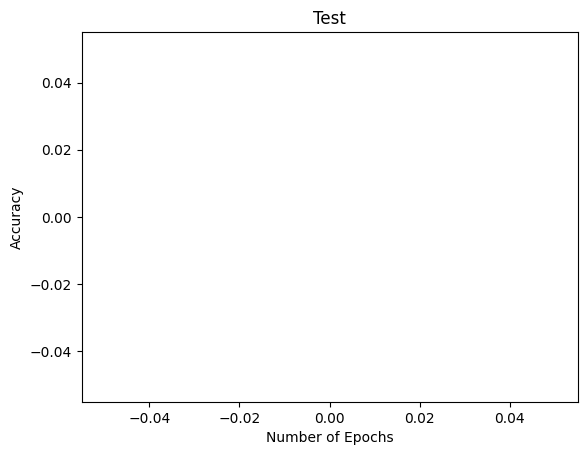

In [55]:
# from _context import vugrad

import numpy as np

# for running from the command line
from argparse import ArgumentParser

import vugrad.vugrad as vg

import matplotlib.pyplot as plt


# (xtrain, ytrain), (xval, yval), num_classes = vg.load_synth()
(xtrain, ytrain), (xval, yval), num_classes = vg.load_mnist(final=False, flatten=True)

num_instances, num_features = xtrain.shape

# Create a simple neural network.
# This is a `Module` consisting of other modules representing linear layers, provided by the vugrad library.
class MLP(vg.Module):
    """
    A simple MLP with one hidden layer, and a sigmoid non-linearity on the hidden layer and a softmax on the
    output.
    """

    def __init__(self, input_size, output_size, hidden_mult=4):
        """
        :param input_size:
        :param output_size:
        :param hidden_mult: Multiplier that indicates how many times bigger the hidden layer is than the input layer.
        """
        super().__init__()

        hidden_size = hidden_mult * input_size
        # -- There is no common wisdom on how big the hidden size should be, apart from the idea
        #    that it should be strictly _bigger_ than the input if at all possible.

        self.layer1 = vg.Linear(input_size, hidden_size)
        self.layer2 = vg.Linear(hidden_size, hidden_size)
        self.layer3 = vg.Linear(hidden_size, hidden_size)
        self.layer4 = vg.Linear(hidden_size, output_size)
        # -- The linear layer (without activation) is implemented in vugrad. We simply instantiate these modules, and
        #    add them to our network.

    def forward(self, input):

        assert len(input.size()) == 2

        # first layer
        l1 = self.layer1(input)
        h1 = vg.relu(l1)
        
        l2 = self.layer2(h1)
        # h2 = vg.sigmoid(l2)
        
        # l3 = self.layer3(h2)
        # h3 = vg.sigmoid(l3)

        # l4 = self.layer4(h2)
        
        # softmax activation
        output = vg.logsoftmax(l2)
        # -- the logsoftmax computes the _logarithm_ of the probabilities produced by softmax. This makes the computation
        #    of the CE loss more stable when the probabilities get close to 0 (remember that the CE loss is the logarithm
        #    of these probabilities). It needs to be implemented in a specific way. See the source for details.

        return output

    def parameters(self):

        return self.layer1.parameters() + self.layer2.parameters() #+ self.layer3.parameters() + self.layer4.parameters()


epochs = 1

def learn():
    ## Instantiate the model
    mlp = MLP(input_size=num_features, output_size=num_classes)

    n, m = xtrain.shape
    b = 128
    lr = 0.01
    accurs = []

    print('\n## Starting training')
    for epoch in range(epochs):

        print(f'epoch {epoch:03}')

        ## Compute validation accuracy
        o = mlp(vg.TensorNode(xval))
        oval = o.value

        predictions = np.argmax(oval, axis=1)
        num_correct = (predictions == yval).sum()
        acc = num_correct / yval.shape[0]

        o.clear() # gc the computation graph
        print(f'       accuracy: {acc:.4}')

        cl = 0.0 # running sum of the training loss

        # We loop over the data in batches of size `b`
        for fr in range(0, n, b):

            # The end index of the batch
            to = min(fr + b, n)

            # Slice out the batch and its corresponding target values
            batch, targets = xtrain[fr:to, :], ytrain[fr:to]

            # Wrap the inputs in a Node
            batch = vg.TensorNode(value=batch)

            outputs = mlp(batch)
            loss = vg.logceloss(outputs, targets)
            # -- The computation graph is now complete. It consists of the MLP, together with the computation of
            #    the scalar loss.
            # -- The variable `loss` is the TensorNode at the very top of our computation graph. This means we can call
            #    it to perform operations on the computation graph, like clearing the gradients, starting the backpropgation
            #    and clearing the graph.
            # -- Note that we set the MLP up to produce log probabilties, so we should compute the CE loss for these.

            cl += loss.value
            # -- We must be careful here to extract the _raw_ value for the running loss. What would happen if we kept
            #    a running sum using the TensorNode?

            # Start the backpropagation
            loss.backward()

            # pply gradient descent
            for parm in mlp.parameters():
                parm.value -= lr * parm.grad
                # -- Note that we are directly manipulating the members of the parm TensorNode. This means that for this
                #    part, we are not building up a computation graph.

            # -- In Pytorch, the gradient descent is abstracted away into an Optimizer. This allows us to build slightly more
            #    complexoptimizers than plain graident descent.

            # Finally, we need to reset the gradients to zero ...
            loss.zero_grad()
            # ... and delete the parts of the computation graph we don't need to remember.
            loss.clear()

        print(f'   running loss: {cl/n:.4}')
        accurs.append(acc)
    return accurs
        
    

    
xax = np.arange(epochs)
y1 = learn()
# y2 = learn()
# y3 = learn()
# y4 = learn()
# y5 = learn()

# mean = np.array([y1, y2, y3, y4, y5]).mean()
mean = np.array([y1]).mean()
print(mean)

plt.plot(xax, y1, label='Line 1')
# plt.plot(xax, y2, label='Line 2')
# plt.plot(xax, y3, label='Line 3')
# plt.plot(xax, y4, label='Line 4')
# plt.plot(xax, y5, label='Line 5')

# plt.plot(accurs)
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.title('Test' )

plt.show()


In [ ]:
# Similar results but not as good. 
# Plot 10 trials each

#### Question 10

In [ ]:
import numpy as np
X = np.array([[1,2,3], [2, 2, 1]])
Y = np.array([[2,2,2], [3, 3, 3]])
d_x = 1 / Y
d_y = -X / (Y ** 2)

### Part 3

#### Question 10

In [5]:
!python ./vugrad/experiments/train_mlp.py -D mnist -b 128 -e 5 -l 0.01

## loaded data:
         number of instances: 55000 in training, 5000 in validation
 training class distribution: [5434 6212 5465 5622 5343 4963 5436 5702 5357 5466]
     val. class distribution: [489 530 493 509 499 458 482 563 494 483]

## Starting training
epoch 000
       accuracy: 0.095
   running loss: 7.764
epoch 001
       accuracy: 0.0978
   running loss: 7.747
epoch 002
       accuracy: 0.0978
   running loss: 7.747
epoch 003
       accuracy: 0.0978
   running loss: 7.747
epoch 004
       accuracy: 0.0978
   running loss: 7.747
Figure(640x480)


In [1]:
!python ./vugrad/experiments/train_mlp.py -D mnist -b 128 -e 5 -l 0.01

## loaded data:
         number of instances: 55000 in training, 5000 in validation
 training class distribution: [5434 6212 5465 5622 5343 4963 5436 5702 5357 5466]
     val. class distribution: [489 530 493 509 499 458 482 563 494 483]

## Starting training
epoch 000
/Users/chrispickett/Desktop/DL/vugrad/vugrad/ops.py:181: RuntimeWarning: overflow encountered in exp
  sigx =  1 / (1 + np.exp(-input))
       accuracy: 0.0694
   running loss: 8.521
epoch 001
       accuracy: 0.0964
   running loss: 8.458
epoch 002
       accuracy: 0.0964
   running loss: 8.451
epoch 003
       accuracy: 0.0964
   running loss: 8.445
epoch 004
       accuracy: 0.0964
   running loss: 8.439
Figure(640x480)
